# Underfitting and overfitting

In this notebook i'll show how underfitting and overfitting could look like in practise, with some simple and easy to follow examples.

I'll use a sklearn utility to create an artifical randomized dataset for demonstration, then i'll show examples of an underfit, overfit and well-fitting classifier.

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=25, noise=0.15, factor=0.3)

In [46]:
from mlxtend.plotting import plot_decision_regions

## https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

%matplotlib inline

## Underfitting

the artificial dataset has a non-linear relation, so a linear classifier such as LogisticRegression can't produce a good fit. The pattern it learns is too simple. What you'll see is a straight line boundary trying to separate the two circles which won't work of course. Let's have a look!

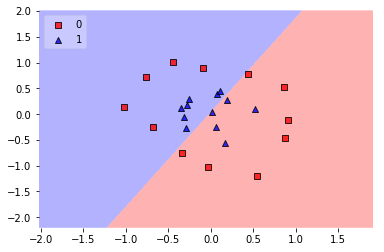

In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

## Overfitting

Now let's take two tree based models. Without regularization these can easily overfit. This means the patterns they learn describe this dataset in too much detail and they might not give best results on unseen data.

This could be a decision boundary that very closely or exactly follows the data points in all details.

Let's see how that could look:

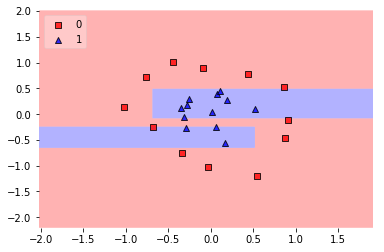

In [48]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

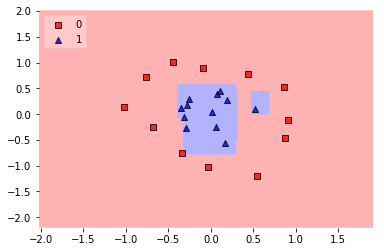

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

## Good fit

A good fit means the decision boundary describes the patterns in the training data well. In this case we have two concentric circles of data points, so we would expect a circular decision boundary.

An SVM classifier will do well here:

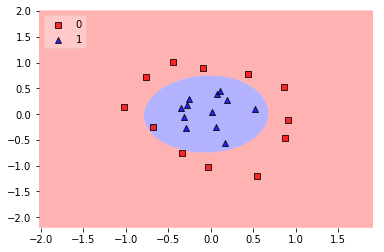

In [49]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

## Conclusions / recommendations

I've shown some basic examples of underfitting, overfitting and good fit. It's good to keep in mind these kind of ways how a classifier can fail. There is some handy rules of thumb to recognize these situations:

* Very fine-grained, detailed decision boundary hints at overfitting
* Rough, too simple decision boundary suggests underfit

Other approach to spotting this can be with learning curves.

Some ways of dealing with this are:

* If you end up with an underfit classifier, pick a more complex non-linear model
* If your classifier overfits, look at regularization, pick a simpler classifier or use more training data